# Create Prediction Model

## Import Modules

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split

from keras import utils
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense
from keras.models import Sequential

### Load the data

In [6]:
PROCESSED_DATA_PATH = ("/Users/lancehester/Documents/dl_predicting_media_channel_sales/data/clean_marketing_telecom.csv")

In [7]:
# Load the marketing data as a pandas dataframe for ease of use
mkt_df = pd.read_csv(PROCESSED_DATA_PATH)

---

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.


Here is where I build, train, and evaluate my regression model.

#### Split: X (features) and y (target)

I define the features and label, where features are the input, the label is the output.

In [8]:
# Features are those features that had some correlation with sales
X = mkt_df[['channel_budget_digital', 'channel_budget_tv', 'channel_budget_radio', 'channel_budget_newspaper']]

# The target or label variable is sales because I am predicting sales
y = mkt_df['sales']

In [9]:
# The dimensions of X
X.shape

(1199, 4)

In [10]:
# The dimensions of Y
y.shape

(1199,)

##### Scaling and Normalizing the data

Feature values have different ranges, so it is best practice to normalize/standarize the features before using them in the model


In [11]:
#feature normalization
normalized_feature =  utils.normalize(X.values)

### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best practices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ratio

In [12]:
# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, y, test_size=0.4, random_state=101)

## Building and Training the Network



In [13]:
# Build Model (Building a three-layer network - with one hidden layer)
# Assuming X_train is already defined and its shape is known
input_shape = X_train.shape[1]

# Build the model
model = Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Predict CLV
y_pred = model.predict(X_test)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 212.5017 - val_loss: 206.8541
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188.3279 - val_loss: 188.1710
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160.0170 - val_loss: 159.3139
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.0366 - val_loss: 117.1062
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.8098 - val_loss: 69.0853
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.5110 - val_loss: 36.1209
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.8739 - val_loss: 27.5225
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.9554 - val_loss: 26.1170
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.5137 - val_loss: 25.0408
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8883 - val_loss: 24.0337
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2939 - val_loss: 23.1101
Epoch 12/100
18/18 ━━━━━━━━━━━━━━

---

## Performing Analysis of the model

* Plot the loss curves after the model has completed training.
* Analyze the loss curve.


Results:

* The model shows good `generalization` from the training to the test data as indicated by the model loss curves below and indicated by the similarity in root mean squared (RMSE) values for the training and test data:

* Training Data RMSE = 3.79
* Testing Data RMSE =  4.15

also shown towards the bottom of this notebook.



In [26]:
loss_test = model.evaluate(X_test,y_test)
print(loss_test)

loss_train = model.evaluate(X_train,y_train)
print(loss_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 17.1644
17.219444274902344
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 14.2251
14.40527057647705


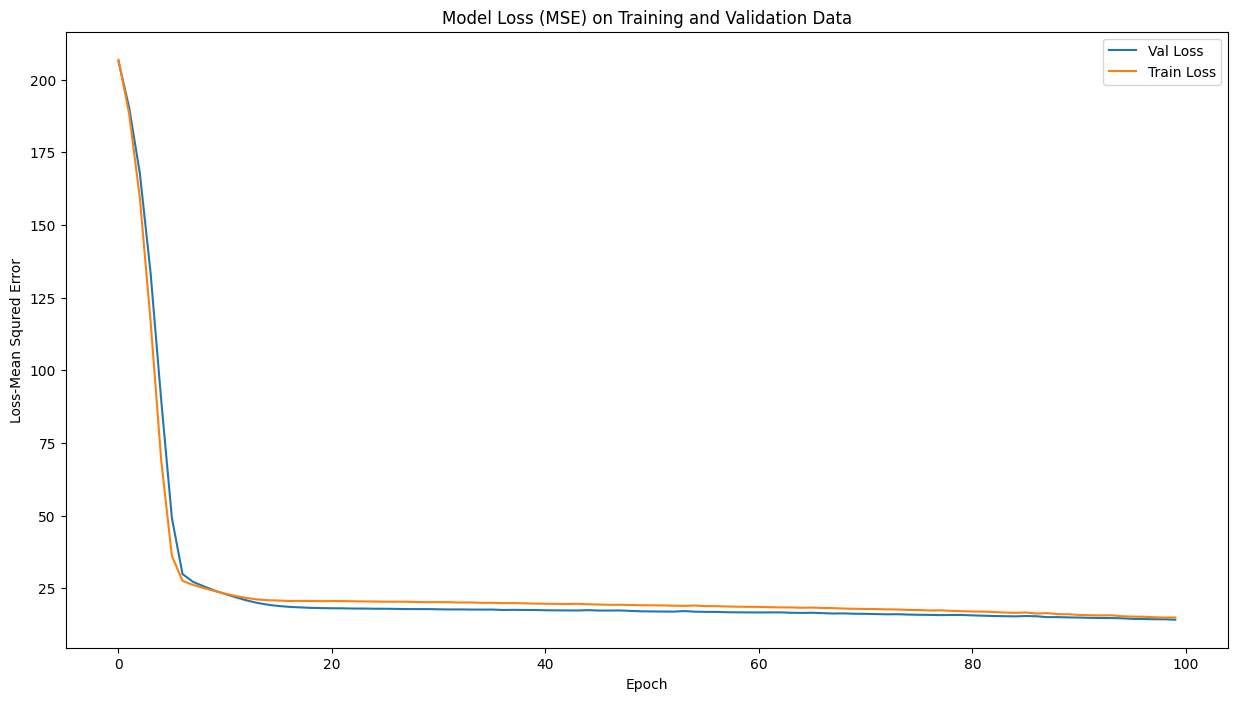

In [14]:
# Visualize the Model Performance

## Plot a graph of model loss -- show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

### Predict Sales

In [15]:
# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
[16.590332  17.728355  14.659568  15.863738  15.182934  15.1122
  7.6567183 18.241333  16.632332  15.91636   10.731178  16.347591
  5.093316  13.987459   5.994585   6.7202396 14.965789  15.148891
  8.575979  15.503482  16.286598  15.7366905 14.896151  14.772898
 14.574517   6.622445  16.24656   15.115704  14.571028   7.948431
 15.170006  17.434723  14.585398  14.008839  12.715573   6.992087
 16.090065  13.159414  14.493759  15.66794   14.165354  16.397205
 15.195624  13.878258  16.336468  18.082397  13.660446  16.090065
 14.789678  15.884405  14.140681   5.994585  15.06447   16.701342
 14.628021  15.390036  13.96314   17.855177  13.511376  14.822936
 10.916211  14.387169   9.64116   15.157639  14.220982   6.870552
 14.361524  16.173223  13.339869  15.133884  12.395037  17.601042
 16.167112  16.698078  14.02773   15.649733  15.58193   13.073524
 17.434723  16.265894  17.225828  15.630119  16.921886  16.707928
 14.3353615 13.570407  14.815737   8.

In [16]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,16.590332
1,19.0,17.728355
2,12.8,14.659568
3,20.8,15.863738
4,16.9,15.182934
5,23.8,15.112200


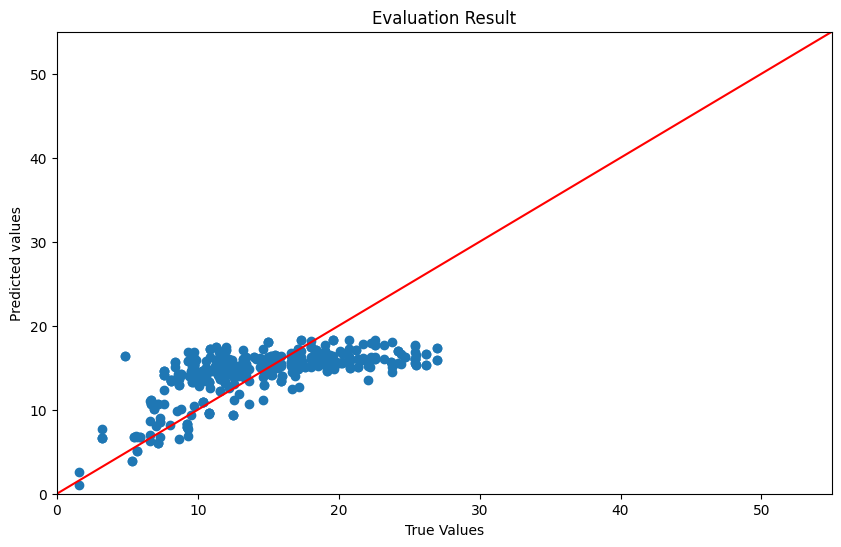

In [17]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

### Show the accuracy of Linear Regression on the Dataset. 

The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data.

I observed that most of the red dots are on or near the line, thus I can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

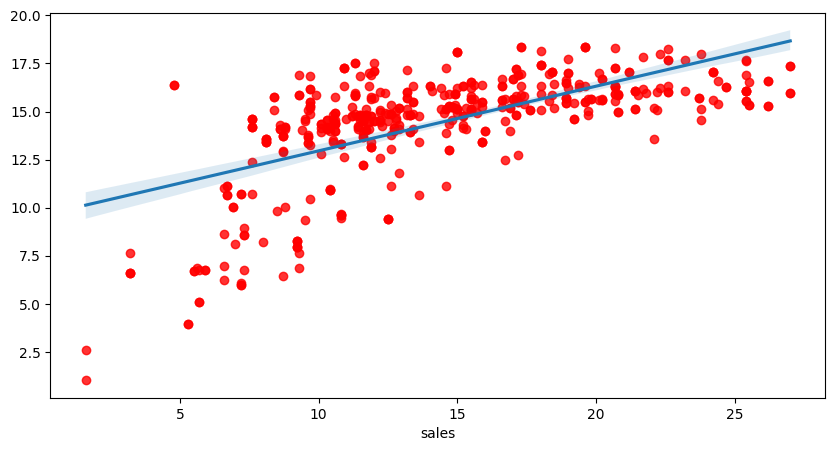

In [18]:
#Accuracy of linear regression on the dataset

plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

In [20]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3.79542752877835
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
4.149631672789392


---
# Now saving the model to be used in a web application

[how to save and load models](https://keras.io/guides/serialization_and_saving/)

In [27]:
KERAS_MODEL_PATH = ("/Users/lancehester/Documents/dl_predicting_media_channel_sales/src/prediction_model.keras")

In [28]:
model.save(KERAS_MODEL_PATH)